In [6]:
import pandas as pd

data = {'年廣告費投入':[12.5, 15.3, 23.2, 26.4, 33.5, 34.4, 39.4, 45.2, 55.4, 60.9],
            '月均銷售額':[21.2, 23.9, 32.9, 34.1, 42.5, 43.2, 49.0, 52.8, 59.4, 63.5]}

dataFrame = pd.DataFrame(data,index=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
dataFrame

,年廣告費投入,月均銷售額
2011,12.5,21.2
2012,15.3,23.9
2013,23.2,32.9
2014,26.4,34.1
2015,33.5,42.5
2016,34.4,43.2
2017,39.4,49.0
2018,45.2,52.8
2019,55.4,59.4
2020,60.9,63.5


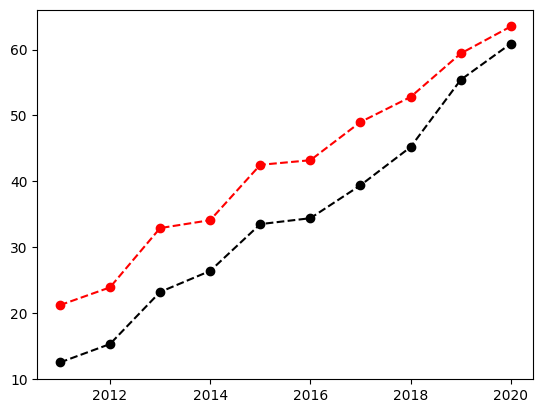

In [7]:
import matplotlib.pyplot as plt

figure = plt.figure()
axes = figure.add_subplot(1,1,1)
axes.plot(dataFrame.index,dataFrame['年廣告費投入'].values,'ko--')
axes.plot(dataFrame.index,dataFrame['月均銷售額'].values,'ro--')
plt.show()

In [8]:
correlation = dataFrame['年廣告費投入'].corr(dataFrame['月均銷售額'])
correlation

0.9941983762371884

In [9]:
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

data = pdr.get_data_yahoo("2330.TW", start="2020-01-01")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,332.5,339.0,332.5,339.0,310.429169,31754120
2020-01-03,344.0,345.0,335.5,339.5,310.886932,41811268
2020-01-06,333.0,334.5,332.0,332.0,304.019073,45343057
2020-01-07,332.5,333.0,326.5,329.5,301.729736,50879181
2020-01-08,325.0,333.0,325.0,329.5,301.729736,37567748
...,...,...,...,...,...,...
2024-01-12,581.0,588.0,581.0,584.0,584.000000,16496053
2024-01-15,590.0,590.0,585.0,586.0,586.000000,21143076
2024-01-16,581.0,588.0,579.0,580.0,580.000000,27223860


In [10]:
for ticks in ["2330.TW", "2303.TW", "2454.TW", "2317.TW"]:
    print(ticks)

2330.TW
2303.TW
2454.TW
2317.TW


In [11]:
all_data = {ticks:pdr.get_data_yahoo(ticks, start="2020-01-01") for ticks in ["2330.TW", "2303.TW", "2454.TW", "2317.TW"]}

all_data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


{'2330.TW':              Open   High    Low  Close   Adj Close    Volume
 Date                                                        
 2020-01-02  332.5  339.0  332.5  339.0  310.429108  31754120
 2020-01-03  344.0  345.0  335.5  339.5  310.886963  41811268
 2020-01-06  333.0  334.5  332.0  332.0  304.019073  45343057
 2020-01-07  332.5  333.0  326.5  329.5  301.729736  50879181
 2020-01-08  325.0  333.0  325.0  329.5  301.729736  37567748
 ...           ...    ...    ...    ...         ...       ...
 2024-01-12  581.0  588.0  581.0  584.0  584.000000  16496053
 2024-01-15  590.0  590.0  585.0  586.0  586.000000  21143076
 2024-01-16  581.0  588.0  579.0  580.0  580.000000  27223860
 2024-01-17  583.0  584.0  578.0  581.0  581.000000  42592335
 2024-01-18  586.0  589.0  585.0  588.0  588.000000  27983627
 
 [986 rows x 6 columns],
 '2303.TW':                  Open       High        Low      Close  Adj Close     Volume
 Date                                                              

In [12]:
for ticks,data in all_data.items():
    print(ticks)
    print(data)

2330.TW
             Open   High    Low  Close   Adj Close    Volume
Date                                                        
2020-01-02  332.5  339.0  332.5  339.0  310.429108  31754120
2020-01-03  344.0  345.0  335.5  339.5  310.886963  41811268
2020-01-06  333.0  334.5  332.0  332.0  304.019073  45343057
2020-01-07  332.5  333.0  326.5  329.5  301.729736  50879181
2020-01-08  325.0  333.0  325.0  329.5  301.729736  37567748
...           ...    ...    ...    ...         ...       ...
2024-01-12  581.0  588.0  581.0  584.0  584.000000  16496053
2024-01-15  590.0  590.0  585.0  586.0  586.000000  21143076
2024-01-16  581.0  588.0  579.0  580.0  580.000000  27223860
2024-01-17  583.0  584.0  578.0  581.0  581.000000  42592335
2024-01-18  586.0  589.0  585.0  588.0  588.000000  27983627

[986 rows x 6 columns]
2303.TW
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  1

In [13]:
dataFrame = pd.DataFrame({ticks:data['Adj Close'] for ticks,data in all_data.items()})
dataFrame

,2330.TW,2303.TW,2454.TW,2317.TW
Date,,,,
2020-01-02,310.429108,13.364813,333.562164,75.553650
2020-01-03,310.886963,13.162928,328.273529,76.219315
2020-01-06,304.019073,12.961042,320.340515,75.304024
2020-01-07,301.729736,12.920666,321.851562,74.139091
2020-01-08,301.729736,12.718780,325.251434,71.975670
...,...,...,...,...
2024-01-12,584.000000,50.099998,926.000000,100.500000
2024-01-15,586.000000,50.799999,922.000000,100.000000
2024-01-16,580.000000,50.799999,895.000000,100.000000


In [14]:
dataFrame1 = dataFrame.rename(columns={
    '2330.TW': "台積電",
    '2303.TW': '聯電',
    '2454.TW': '聯發科',
    '2317.TW': '鴻海'
})

dataFrame1

,台積電,聯電,聯發科,鴻海
Date,,,,
2020-01-02,310.429108,13.364813,333.562164,75.553650
2020-01-03,310.886963,13.162928,328.273529,76.219315
2020-01-06,304.019073,12.961042,320.340515,75.304024
2020-01-07,301.729736,12.920666,321.851562,74.139091
2020-01-08,301.729736,12.718780,325.251434,71.975670
...,...,...,...,...
2024-01-12,584.000000,50.099998,926.000000,100.500000
2024-01-15,586.000000,50.799999,922.000000,100.000000
2024-01-16,580.000000,50.799999,895.000000,100.000000


In [16]:
dataFrame2 = dataFrame1.pct_change()
display(dataFrame2)
dataFrame3 = dataFrame2.iloc[1:]
display(dataFrame3)

,台積電,聯電,聯發科,鴻海
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,0.001475,-0.015106,-0.015855,0.008810
2020-01-06,-0.022091,-0.015337,-0.024166,-0.012009
2020-01-07,-0.007530,-0.003115,0.004717,-0.015470
2020-01-08,0.000000,-0.015625,0.010563,-0.029181
...,...,...,...,...
2024-01-12,-0.003413,0.000000,0.006522,0.000000
2024-01-15,0.003425,0.013972,-0.004320,-0.004975
2024-01-16,-0.010239,0.000000,-0.029284,0.000000


,台積電,聯電,聯發科,鴻海
Date,,,,
2020-01-03,0.001475,-0.015106,-0.015855,0.008810
2020-01-06,-0.022091,-0.015337,-0.024166,-0.012009
2020-01-07,-0.007530,-0.003115,0.004717,-0.015470
2020-01-08,0.000000,-0.015625,0.010563,-0.029181
2020-01-09,0.024279,0.019048,0.015099,0.006936
...,...,...,...,...
2024-01-12,-0.003413,0.000000,0.006522,0.000000
2024-01-15,0.003425,0.013972,-0.004320,-0.004975
2024-01-16,-0.010239,0.000000,-0.029284,0.000000


In [17]:
dataFrame3.corr()

,台積電,聯電,聯發科,鴻海
台積電,1.000000,0.524089,0.541427,0.425599
聯電,0.524089,1.000000,0.443472,0.364299
聯發科,0.541427,0.443472,1.000000,0.382698
鴻海,0.425599,0.364299,0.382698,1.000000


In [18]:
data = pdr.get_data_yahoo("^TWII", start="2020-01-01")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,12026.500000,12110.740234,12026.230469,12100.480469,12100.480469,2023800
2020-01-03,12167.440430,12197.639648,12023.599609,12110.429688,12110.429688,2572900
2020-01-06,12035.709961,12040.080078,11953.360352,11953.360352,11953.360352,2345200
2020-01-07,11961.969727,11986.030273,11822.400391,11880.320312,11880.320312,2338400
2020-01-08,11818.759766,11899.669922,11777.450195,11817.099609,11817.099609,2428800
...,...,...,...,...,...,...
2024-01-12,17536.050781,17570.630859,17469.869141,17512.830078,17512.830078,2596200
2024-01-15,17541.259766,17632.769531,17532.980469,17546.820312,17546.820312,0
2024-01-16,17523.779297,17523.779297,17337.580078,17346.869141,17346.869141,3415100
